In [1]:
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import tqdm 
from collections import defaultdict

from itertools import combinations

In [454]:
df = pd.read_csv('outputs/analysis_lists/all_analysis_week_12.csv')

policies = ['rmab', 'control', 'round_robin']
T = 12

engagement_matrix = {pol:[] for pol in policies}
for pol in policies:
    for week in range(T):
        df[f'mat-{week}'] = df[f'week{week}_E/C'].apply(lambda x: int(x[0]))
    mat_cols = [col for col in df.columns if col.startswith('mat')] 
    engagement_matrix[pol] = (df[df['arm']==pol][mat_cols].values>0).astype(int)

In [3]:
cumu_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
cumu_engage = {'rmab': [], 'round_robin': [], 'control': []}
inst_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
inst_engage = {'rmab': [], 'round_robin': [], 'control': []}

for week in range(1, T):
    print(f'week {week}')

    for pol in ['control' , 'rmab','round_robin' ]:
        r_n_0 = engagement_matrix[pol][:, 1].sum()
        cumu_rew = engagement_matrix[pol][:, 1:week+1].sum()
        inst_rew = engagement_matrix[pol][:, week].sum()
        
        cumu_engage_drop = cumu_rew - (week)*r_n_0
        inst_engage_drop = inst_rew - r_n_0
        
        cumu_engage[pol].append(cumu_rew)
        inst_engage[pol].append(inst_rew)
        
        cumu_engage_drops[pol].append(cumu_engage_drop)
        inst_engage_drops[pol].append(inst_engage_drop)
        
        print(pol)
        print(f'\t r_0: {r_n_0}, inst_rew: {inst_rew}, cumu_rew: {cumu_rew}, cumu rew drop: {cumu_engage_drop}')


week 1
control
	 r_0: 3547, inst_rew: 3547, cumu_rew: 3547, cumu rew drop: 0
rmab
	 r_0: 3547, inst_rew: 3547, cumu_rew: 3547, cumu rew drop: 0
round_robin
	 r_0: 3522, inst_rew: 3522, cumu_rew: 3522, cumu rew drop: 0
week 2
control
	 r_0: 3547, inst_rew: 3445, cumu_rew: 6992, cumu rew drop: -102
rmab
	 r_0: 3547, inst_rew: 3489, cumu_rew: 7036, cumu rew drop: -58
round_robin
	 r_0: 3522, inst_rew: 3431, cumu_rew: 6953, cumu rew drop: -91
week 3
control
	 r_0: 3547, inst_rew: 3483, cumu_rew: 10475, cumu rew drop: -166
rmab
	 r_0: 3547, inst_rew: 3428, cumu_rew: 10464, cumu rew drop: -177
round_robin
	 r_0: 3522, inst_rew: 3436, cumu_rew: 10389, cumu rew drop: -177
week 4
control
	 r_0: 3547, inst_rew: 3350, cumu_rew: 13825, cumu rew drop: -363
rmab
	 r_0: 3547, inst_rew: 3300, cumu_rew: 13764, cumu rew drop: -424
round_robin
	 r_0: 3522, inst_rew: 3287, cumu_rew: 13676, cumu rew drop: -412
week 5
control
	 r_0: 3547, inst_rew: 3309, cumu_rew: 17134, cumu rew drop: -601
rmab
	 r_0: 3547

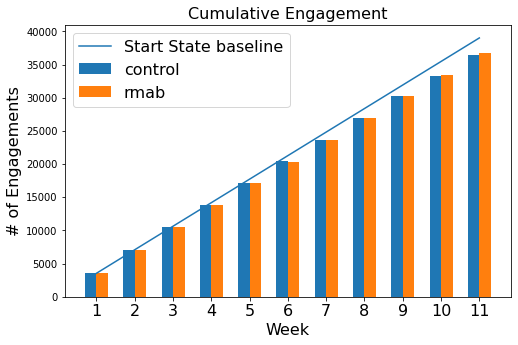

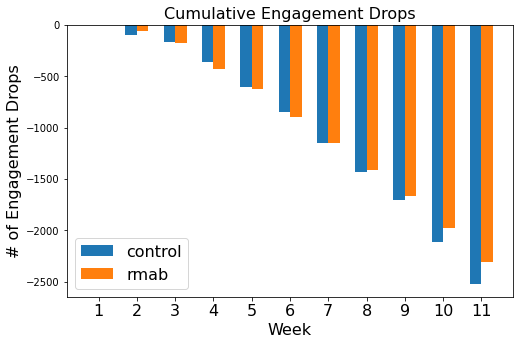

In [4]:
# label = dict(zip(['rmab','round_robin' ],['RMAB Group','Round Robin' ] ))
# for pol in ['control','rmab','round_robin' ]:
#     plt.bar(range(1, T), cumu_engage[pol], label=pol)
#     print(pol, cumu_engage[pol])

fig=plt.figure(figsize=(8,5))

width = 0.3
pol='control'
plt.bar(np.arange(1,T)-width/2, np.array(cumu_engage[pol]),width=width, label=pol)

pol = 'rmab'
plt.bar(np.arange(1,T)+width/2, np.array(cumu_engage[pol]),width=width, label=pol)
plt.plot(np.arange(1,T), np.arange(1,T)*cumu_engage[pol][0], label='Start State baseline')
# plt.plot(np.arange(1,T), [cumu_engage[pol][0] for i in range(T-1)], label='Start State baseline (const)')

plt.xticks(range(1,T), range(1, T), fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.ylabel('# of Engagements', fontsize=16)
plt.title('Cumulative Engagement', fontsize=16)

plt.legend(fontsize=16)
plt.show()


fig=plt.figure(figsize=(8,5))

width = 0.3
pol='control'
plt.bar(np.arange(1,T)-width/2, np.array(cumu_engage_drops[pol]),width=width, label=pol)

pol = 'rmab'
plt.bar(np.arange(1,T)+width/2, np.array(cumu_engage_drops[pol]),width=width, label=pol)

plt.xticks(range(1,T), range(1, T), fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.ylabel('# of Engagement Drops', fontsize=16)
plt.title('Cumulative Engagement Drops', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [5]:
cumu_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
cumu_engage = {'rmab': [], 'round_robin': [], 'control': []}
inst_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
inst_engage = {'rmab': [], 'round_robin': [], 'control': []}

for week in range(T):
    print(f'week {week}')

    for pol in ['control' , 'rmab','round_robin' ]:
        r_n_0 = engagement_matrix[pol][:, 0].sum()
        cumu_rew = engagement_matrix[pol][:, :week+1].sum()
        inst_rew = engagement_matrix[pol][:, week].sum()
        
        cumu_engage_drop = cumu_rew - (week)*r_n_0
        inst_engage_drop = inst_rew - r_n_0
        
        cumu_engage[pol].append(cumu_rew)
        inst_engage[pol].append(inst_rew)
        
        cumu_engage_drops[pol].append(cumu_engage_drop)
        inst_engage_drops[pol].append(inst_engage_drop)
        
        print(pol)
        print(f'\t r_0: {r_n_0}, inst_rew: {inst_rew}, cumu_rew: {cumu_rew}, cumu rew drop: {cumu_engage_drop}')


week 0
control
	 r_0: 3661, inst_rew: 3661, cumu_rew: 3661, cumu rew drop: 3661
rmab
	 r_0: 3571, inst_rew: 3571, cumu_rew: 3571, cumu rew drop: 3571
round_robin
	 r_0: 3647, inst_rew: 3647, cumu_rew: 3647, cumu rew drop: 3647
week 1
control
	 r_0: 3661, inst_rew: 3547, cumu_rew: 7208, cumu rew drop: 3547
rmab
	 r_0: 3571, inst_rew: 3547, cumu_rew: 7118, cumu rew drop: 3547
round_robin
	 r_0: 3647, inst_rew: 3522, cumu_rew: 7169, cumu rew drop: 3522
week 2
control
	 r_0: 3661, inst_rew: 3445, cumu_rew: 10653, cumu rew drop: 3331
rmab
	 r_0: 3571, inst_rew: 3489, cumu_rew: 10607, cumu rew drop: 3465
round_robin
	 r_0: 3647, inst_rew: 3431, cumu_rew: 10600, cumu rew drop: 3306
week 3
control
	 r_0: 3661, inst_rew: 3483, cumu_rew: 14136, cumu rew drop: 3153
rmab
	 r_0: 3571, inst_rew: 3428, cumu_rew: 14035, cumu rew drop: 3322
round_robin
	 r_0: 3647, inst_rew: 3436, cumu_rew: 14036, cumu rew drop: 3095
week 4
control
	 r_0: 3661, inst_rew: 3350, cumu_rew: 17486, cumu rew drop: 2842
rmab


In [386]:
reg = pd.read_csv('feb16-mar15_data/beneficiary/ai_registration-20210216-20210315.csv', sep='\t')
df = pd.merge(df.drop(columns=['registration_date']), reg[['user_id', 'registration_date']], on='user_id')



In [387]:
df

,Unnamed: 0,user_id,cluster,arm,intervention_week,week1_whittle,after_intervention_E/C,week12_whittle,week0_E/C,week1_E/C,...,mat-3,mat-4,mat-5,mat-6,mat-7,mat-8,mat-9,mat-10,mat-11,registration_date
0,0,2394384,29,rmab,week1,0.865692,20/20,-0.387939,0/2,2/2,...,2,2,2,2,2,2,2,2,2,2021-02-18
1,80,2396341,29,round_robin,week11,0.865692,0/0,0.000000,0/0,0/0,...,0,1,0,0,1,0,1,0,0,2021-02-23
2,102,2395407,29,rmab,week11,0.865692,0/0,0.000000,0/0,0/0,...,0,1,1,0,0,1,0,0,0,2021-02-26
3,103,2405773,29,rmab,week1,0.865692,0/0,0.865692,0/0,0/0,...,0,0,0,0,0,0,0,0,0,2021-03-10
4,104,2391765,29,control,NaN,0.865692,0/0,-0.387939,0/2,0/2,...,0,0,0,0,1,0,2,1,1,2021-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22998,22973,2402502,34,rmab,NaN,-0.882812,0/0,-0.882812,0/1,1/1,...,0,0,2,1,1,1,1,0,0,2021-02-25
22999,22972,2391003,34,round_robin,week1,-0.882812,0/9,-0.882812,0/2,0/2,...,0,0,0,0,0,0,0,0,0,2021-01-29
23000,22971,2390953,34,control,NaN,-0.882812,0/0,-0.882812,0/0,0/0,...,0,0,0,0,0,0,0,0,0,2021-02-10
23001,22970,2385630,34,control,NaN,-0.882812,0/0,-0.882812,0/0,0/0,...,0,0,0,0,0,0,0,0,0,2021-02-16


## Count number of swaps needed

In [104]:
ss_rmab, ss_rr, ss_control = inst_engage['rmab'][0], inst_engage['round_robin'][0], inst_engage['control'][0]
ss_hat = (ss_rmab + ss_rr + ss_control)/3
print(ss_hat)
ss_hat_rmab, ss_hat_rr, ss_hat_control = 3626, 3626, 3627

3626.3333333333335


In [105]:
sum([ss_hat_rmab, ss_hat_rr, ss_hat_control]), sum([ss_rmab, ss_rr, ss_control])

(10879, 10879)

In [106]:
ss_hat_rmab-ss_rmab, ss_hat_rr-ss_rr, ss_hat_control-ss_control

(55, -21, -34)

# Beneficiaries who were never intervened on in RMAB can be moved to CONTROL

## NE from RMAB to CONTROL
### 1. IN RMAB
### 2. Start State NE
### 3. Never got an intervention 
### -> can be safely moved to Control

In [390]:
interv_df = pd.read_csv('outputs/interventions.csv')
horizon = 11
weeks = [f'week{i+1}' for i in range(horizon)]
interv_upto_horizon = interv_df[interv_df['intervene_week'].isin(weeks)]

In [391]:
rmab_ss_NE = df[(df['arm']=='rmab') & (df['mat-0']==0)]
rmab_ss_NE_never_interv = rmab_ss_NE[~rmab_ss_NE['user_id'].isin(interv_upto_horizon['user_id'])]
rmab_ss_NE_never_interv

,Unnamed: 0,user_id,cluster,arm,intervention_week,week1_whittle,after_intervention_E/C,week12_whittle,week0_E/C,week1_E/C,...,mat-3,mat-4,mat-5,mat-6,mat-7,mat-8,mat-9,mat-10,mat-11,registration_date
2346,2448,2390588,21,rmab,NaN,0.452606,0/0,-0.030930,0/2,2/2,...,0,1,2,2,2,2,2,2,2,2021-02-11
2388,2489,2402602,21,rmab,NaN,0.452606,0/0,-0.030930,0/2,2/2,...,2,2,1,2,2,2,1,2,1,2021-02-25
5528,5706,2396111,13,rmab,NaN,0.380714,0/0,0.380714,0/5,0/2,...,0,1,0,0,0,0,0,0,0,2021-02-24
5530,5704,2389241,13,rmab,NaN,0.380714,0/0,0.380714,0/2,0/2,...,0,1,2,0,1,0,0,0,0,2021-02-11
5532,5702,2398198,13,rmab,NaN,0.380714,0/0,0.380714,0/1,0/0,...,0,0,0,0,0,0,0,0,0,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22989,22983,2399577,34,rmab,NaN,-0.882812,0/0,-0.882812,0/0,0/0,...,0,0,0,0,0,0,0,0,0,2021-03-01
22992,22979,2404561,34,rmab,NaN,-0.882812,0/0,0.145004,0/2,0/1,...,0,0,0,0,0,0,1,0,1,2021-03-09
22996,22975,2402365,34,rmab,NaN,-0.882812,0/0,-0.882812,0/0,0/0,...,0,0,0,0,0,0,0,0,0,2021-02-28
22997,22974,2408844,34,rmab,NaN,-0.882812,0/0,-0.882812,0/0,0/0,...,0,1,0,0,0,0,0,0,0,2021-03-09


In [392]:
## 3624 NE can move out from RMAB - horizon 6
## 3102 NE can move out from RMAB - horizon 11

# Beneficiries in CONTROL whose whittle index at every timestep is such that they would never be intervened on even in RMAB 


## E from CONTROL to RMAB
### 1. In CONTROL
### 2. Start State E -> call them candidate beneficiries
### 3. For every timestep t:
###   - (a) lambda_k_t = lowest whittle index among arms pulled in RMAB
###   - (b) calculate whittle index for candidate beneficiries (1 to i) at timestep t -> lambda c_i_t
###   - (c) if lambda c_i_t > lambda k_t , remove beneficiary i from candidate set
### 4. Beneficiries in candidate set
### -> can be safely moved to RMAB

In [393]:
interv_df = pd.read_csv('outputs/interventions.csv')
whittle_df = pd.read_csv('outputs/state-cluster-whittle-E_C.csv')
complete_group = pd.read_csv('outputs/individual_clustering/weekly_kmeans_pilot_stats_40.csv')
whittle_df['week0_whittle'] = complete_group['whittle_index']


In [394]:
control_ss_E = df[(df['arm']=='control') & (df['mat-0']>0)]
candidate_set_control = control_ss_E.user_id

for t in range(horizon):
    print(t+1, len(candidate_set))
    k = interv_df[(interv_df['intervene_week']==f'week{t+1}') &
                 (interv_df['exp_group']=='rmab')].shape[0]
    rmab_lambda_k_o = whittle_df[whittle_df['arm']=='rmab'][f'week{t}_whittle'].sort_values().iloc[-k]
    week_t_interv = interv_df[(interv_df['intervene_week']==f'week{t+1}')]
    rmab_lambda_k = whittle_df[(whittle_df['user_id'].isin(week_t_interv['user_id'])) &
                               (whittle_df['arm']=='rmab')][f'week{t}_whittle'].min()
    
    control_ss_E_valid_whittle = whittle_df[(whittle_df['user_id'].isin(candidate_set_control)) &
                                           (whittle_df[f'week{t}_whittle']<rmab_lambda_k)]
    
    print(k, rmab_lambda_k, rmab_lambda_k_o, control_ss_E_valid_whittle[f'week{t}_whittle'].max())
    candidate_set_control = control_ss_E_valid_whittle.user_id
print('Valid Candidate set size: ', len(candidate_set_control))

1 576
125 0.8245658874511719 0.8245658874511719 0.6309280395507812
2 576
200 0.6077728271484375 0.6077728271484375 0.5901641845703125
3 576
200 0.0 0.5901641845703125 -0.00080108642578125
4 576
200 0.0 0.4651718139648438 -0.00080108642578125
5 576
235 0.4651718139648438 0.4651718139648438 0.452606201171875
6 576
300 0.452606201171875 0.452606201171875 0.4123992919921875
7 576
350 -0.003604888916015625 0.3941574096679688 -0.0122833251953125
8 576
500 0.3941574096679688 0.3941574096679688 0.3807144165039063
9 576
500 0.3941574096679688 0.3941574096679688 0.3807144165039063
10 576
500 0.3941574096679688 0.3941574096679688 0.3807144165039063
11 576
500 0.3807144165039063 0.3941574096679688 0.347381591796875
Valid Candidate set size:  396


### Sanity Checks

In [395]:
cands = whittle_df[whittle_df['arm']=='rmab'][['week1_whittle', 'user_id']].sort_values('week1_whittle').tail(200)
cands.sort_values('user_id')

,week1_whittle,user_id
758,0.630928,2385615
19536,0.630928,2385643
22764,0.836349,2385866
22815,0.836349,2386137
759,0.630928,2386249
...,...,...
572,0.630928,2408462
22723,0.836349,2408510
598,0.630928,2408640
748,0.630928,2408810


In [396]:
interv_df[(interv_df['exp_group']=='rmab') & (interv_df['intervene_week']=='week2')].sort_values('user_id')

,Unnamed: 0,user_id,intervene_week,intervene_date,exp_group,cluster,days_since_reg
865,865,2385615,week2,2021-05-06,rmab,27,80
582,582,2385643,week2,2021-05-06,rmab,27,79
797,797,2385866,week2,2021-05-06,rmab,1,80
905,905,2386137,week2,2021-05-06,rmab,1,85
1062,1062,2386249,week2,2021-05-06,rmab,27,82
...,...,...,...,...,...,...,...
1055,1055,2408462,week2,2021-05-06,rmab,27,52
442,442,2408510,week2,2021-05-06,rmab,1,52
437,437,2408640,week2,2021-05-06,rmab,27,55
716,716,2408810,week2,2021-05-06,rmab,27,57


In [397]:
## 672 Engaging beneficiries can be moved from Control to other groups - horizon 6
## 396 Engaging beneficiries can be moved from Control to other groups - horizon 11

# Beneficiaries who were never intervened on in RMAB can be moved to RR if they were registered very late

## NE from RMAB to RR
### 1. IN RMAB
### 2. Start State NE
### 3. Never got an intervention 
### 4. Registration Date more than RR's max registration date of intervened
### -> can be safely moved to RR

In [399]:
rr_last_week_interv = interv_df[(interv_df['exp_group']=='round_robin') &
                                (interv_df['intervene_week']==f'week{horizon}')]
rr_interv_last_reg_date = pd.to_datetime(df[df['user_id'].isin(rr_last_week_interv.user_id)]['registration_date']).max()

rr_interv_last_reg_date

Timestamp('2021-02-23 00:00:00')

In [400]:
rmab_no_rr_interv = rmab_ss_NE_never_interv[pd.to_datetime(rmab_ss_NE_never_interv['registration_date'])>rr_interv_last_reg_date]
rmab_no_rr_interv

,Unnamed: 0,user_id,cluster,arm,intervention_week,week1_whittle,after_intervention_E/C,week12_whittle,week0_E/C,week1_E/C,...,mat-3,mat-4,mat-5,mat-6,mat-7,mat-8,mat-9,mat-10,mat-11,registration_date
2388,2489,2402602,21,rmab,NaN,0.452606,0/0,-0.030930,0/2,2/2,...,2,2,1,2,2,2,1,2,1,2021-02-25
5528,5706,2396111,13,rmab,NaN,0.380714,0/0,0.380714,0/5,0/2,...,0,1,0,0,0,0,0,0,0,2021-02-24
5532,5702,2398198,13,rmab,NaN,0.380714,0/0,0.380714,0/1,0/0,...,0,0,0,0,0,0,0,0,0,2021-03-01
5533,5701,2403276,13,rmab,NaN,0.380714,0/0,0.380714,0/0,0/0,...,0,0,0,0,0,0,0,0,0,2021-03-05
5534,5699,2403273,13,rmab,NaN,0.380714,0/0,0.380714,0/2,0/2,...,0,0,0,0,0,1,0,2,0,2021-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22989,22983,2399577,34,rmab,NaN,-0.882812,0/0,-0.882812,0/0,0/0,...,0,0,0,0,0,0,0,0,0,2021-03-01
22992,22979,2404561,34,rmab,NaN,-0.882812,0/0,0.145004,0/2,0/1,...,0,0,0,0,0,0,1,0,1,2021-03-09
22996,22975,2402365,34,rmab,NaN,-0.882812,0/0,-0.882812,0/0,0/0,...,0,0,0,0,0,0,0,0,0,2021-02-28
22997,22974,2408844,34,rmab,NaN,-0.882812,0/0,-0.882812,0/0,0/0,...,0,1,0,0,0,0,0,0,0,2021-03-09


In [401]:
## 3018 NE people can be moved from RMAB to RR - horizon 6
## 1676 NE people can be moved from RMAB to RR - horizon 11

# Beneficiries in RR whose whittle index at every timestep is such that they would never be intervened on even in RMAB. Also they were never intervened in RR


## E from RR to RMAB
### 1. In RR
### 2. Start State E -> call them candidate beneficiries
### 3. For every timestep t:
###   - (a) lambda_k_t = lowest whittle index among arms pulled in RMAB
###   - (b) calculate whittle index for candidate beneficiries (1 to i) at timestep t -> lambda c_i_t
###   - (c) if lambda c_i_t > lambda k_t , remove beneficiary i from candidate set
### 4. Beneficiries in candidate set
### -> can be safely moved to RMAB

In [402]:
RR_ss_E = df[(df['arm']=='round_robin') & (df['mat-0']>0) & ~(df['user_id'].isin(interv_upto_horizon.user_id))]
candidate_set_rr = RR_ss_E.user_id

for t in range(horizon):
    print(t+1, len(candidate_set))
    k = interv_df[(interv_df['intervene_week']==f'week{t+1}') &
                 (interv_df['exp_group']=='rmab')].shape[0]
    rmab_lambda_k_o = whittle_df[whittle_df['arm']=='rmab'][f'week{t}_whittle'].sort_values().iloc[-k]
    week_t_interv = interv_df[(interv_df['intervene_week']==f'week{t+1}')]
    rmab_lambda_k = whittle_df[(whittle_df['user_id'].isin(week_t_interv['user_id'])) &
                               (whittle_df['arm']=='rmab')][f'week{t}_whittle'].min()
    
    RR_ss_E_valid_whittle = whittle_df[(whittle_df['user_id'].isin(candidate_set_rr)) &
                                           (whittle_df[f'week{t}_whittle']<rmab_lambda_k)]
    
    print(k, rmab_lambda_k, rmab_lambda_k_o, control_ss_E_valid_whittle[f'week{t}_whittle'].max())
    candidate_set_rr = RR_ss_E_valid_whittle.user_id
print('Valid Candidate set size: ', len(candidate_set_rr))

1 576
125 0.8245658874511719 0.8245658874511719 0.6309280395507812
2 576
200 0.6077728271484375 0.6077728271484375 0.5901641845703125
3 576
200 0.0 0.5901641845703125 -0.0122833251953125
4 576
200 0.0 0.4651718139648438 -0.0122833251953125
5 576
235 0.4651718139648438 0.4651718139648438 0.452606201171875
6 576
300 0.452606201171875 0.452606201171875 0.3807144165039063
7 576
350 -0.003604888916015625 0.3941574096679688 -0.0122833251953125
8 576
500 0.3941574096679688 0.3941574096679688 0.3807144165039063
9 576
500 0.3941574096679688 0.3941574096679688 0.3807144165039063
10 576
500 0.3941574096679688 0.3941574096679688 0.3807144165039063
11 576
500 0.3807144165039063 0.3941574096679688 0.347381591796875
Valid Candidate set size:  230


In [403]:
## 576 E people can be moved from RR to RMAB - horizon 6
## 230 E people can be moved from RR to RMAB - horizon 11


In [ ]:
candidate_set_rr #RR -> RMAB 
candidate_set_control # Control -> RMAB
rmab_no_rr_interv # RMAB to RR
rmab_ss_NE_never_interv # RMAB to RR/Control


In [420]:

big_new_engagement_matrix = {}
big_cumu_engage_drops = {}
big_cumu_engage = {}
big_inst_engage = {}
for pol in ['control','rmab','round_robin' ]:
    big_new_engagement_matrix [pol] = []
    big_cumu_engage_drops [pol] = []
    big_cumu_engage [pol] = []
    big_inst_engage [pol] = []

for seed in range(100):
    new_df = df.copy()
    rr_2_rmab = candidate_set_rr.sample(ss_rr - ss_hat_rr, random_state=seed)
    control_2_rmab = candidate_set_control.sample(ss_control - ss_hat_control, random_state=seed)
    rmab_2_rr = rmab_no_rr_interv['user_id'].sample(ss_rr - ss_hat_rr, random_state=seed)
    rmab_2_control = rmab_ss_NE_never_interv[~rmab_ss_NE_never_interv['user_id'].isin(rmab_2_rr)]['user_id'].sample(ss_control - ss_hat_control, random_state=seed)
    print('\n', rr_2_rmab.iloc[0], '\n')
    new_df.loc[new_df['user_id'].isin(rr_2_rmab), 'arm'] = 'rmab'
    new_df.loc[new_df['user_id'].isin(control_2_rmab), 'arm'] = 'rmab'
    new_df.loc[new_df['user_id'].isin(rmab_2_rr), 'arm'] = 'round_robin'
    new_df.loc[new_df['user_id'].isin(rmab_2_control), 'arm'] = 'control'


    new_engagement_matrix = {}

    for pol in ['control','rmab','round_robin' ]:
        big_new_engagement_matrix[pol].append((new_df[new_df['arm']==pol][mat_cols].values>0).astype(int))
        new_engagement_matrix[pol] = big_new_engagement_matrix[pol][-1]
        print(pol)
        print('\tnew shape', new_engagement_matrix[pol].shape)
        print('\tstart engaging count', new_engagement_matrix[pol][:, 0].sum())


    new_cumu_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
    new_cumu_engage = {'rmab': [], 'round_robin': [], 'control': []}
    new_inst_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
    new_inst_engage = {'rmab': [], 'round_robin': [], 'control': []}

    for week in range(horizon):
        print(f'week {week}')

        for pol in ['control' , 'rmab','round_robin' ]:
            r_n_0 = new_engagement_matrix[pol][:, 0].sum()
            cumu_rew = new_engagement_matrix[pol][:, :week+1].sum()
            inst_rew = new_engagement_matrix[pol][:, week].sum()

            new_cumu_engage_drop = cumu_rew - (week+1)*r_n_0
            new_inst_engage_drop = inst_rew - r_n_0

            new_cumu_engage[pol].append(cumu_rew)
            new_inst_engage[pol].append(inst_rew)

            new_cumu_engage_drops[pol].append(new_cumu_engage_drop)
            new_inst_engage_drops[pol].append(new_inst_engage_drop)

            print(pol)
            print(f'\t r_0: {r_n_0}, inst_rew: {inst_rew}, cumu_rew: {cumu_rew}, cumu rew drop: {new_cumu_engage_drop}')

    for pol in ['control' , 'rmab','round_robin' ]:
        big_cumu_engage_drops [pol].append(np.array(new_cumu_engage_drops[pol][::]))
        big_inst_engage [pol].append(np.array(new_inst_engage[pol][::]))
        big_cumu_engage [pol].append(np.array(new_cumu_engage[pol][::]))


 2405841 

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3522, cumu_rew: 7149, cumu rew drop: -105
rmab
	 r_0: 3626, inst_rew: 3588, cumu_rew: 7214, cumu rew drop: -38
round_robin
	 r_0: 3626, inst_rew: 3506, cumu_rew: 7132, cumu rew drop: -120
week 2
control
	 r_0: 3627, inst_rew: 3416, cumu_rew: 10565, cumu rew drop: -316
rmab
	 r_0: 3626, inst_rew: 3536, cumu_rew: 10750, cumu rew drop: -128
round_robin
	 r_0: 3626, inst_rew: 3413, cumu_rew: 10545, cumu rew drop: -333
week 3
control
	 r_0: 3627, inst_rew: 3458, cumu_rew: 14023, cumu rew drop: -485
rmab
	 r_0: 3626, inst_rew: 3470, cumu_rew: 14220, cumu rew d

round_robin
	 r_0: 3626, inst_rew: 3306, cumu_rew: 23900, cumu rew drop: -1482
week 7
control
	 r_0: 3627, inst_rew: 3226, cumu_rew: 27152, cumu rew drop: -1864
rmab
	 r_0: 3626, inst_rew: 3333, cumu_rew: 27566, cumu rew drop: -1442
round_robin
	 r_0: 3626, inst_rew: 3305, cumu_rew: 27205, cumu rew drop: -1803
week 8
control
	 r_0: 3627, inst_rew: 3236, cumu_rew: 30388, cumu rew drop: -2255
rmab
	 r_0: 3626, inst_rew: 3325, cumu_rew: 30891, cumu rew drop: -1743
round_robin
	 r_0: 3626, inst_rew: 3295, cumu_rew: 30500, cumu rew drop: -2134
week 9
control
	 r_0: 3627, inst_rew: 3248, cumu_rew: 33636, cumu rew drop: -2634
rmab
	 r_0: 3626, inst_rew: 3340, cumu_rew: 34231, cumu rew drop: -2029
round_robin
	 r_0: 3626, inst_rew: 3316, cumu_rew: 33816, cumu rew drop: -2444
week 10
control
	 r_0: 3627, inst_rew: 3114, cumu_rew: 36750, cumu rew drop: -3147
rmab
	 r_0: 3626, inst_rew: 3269, cumu_rew: 37500, cumu rew drop: -2386
round_robin
	 r_0: 3626, inst_rew: 3239, cumu_rew: 37055, cumu rew 

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3521, cumu_rew: 7148, cumu rew drop: -106
rmab
	 r_0: 3626, inst_rew: 3588, cumu_rew: 7214, cumu rew drop: -38
round_robin
	 r_0: 3626, inst_rew: 3507, cumu_rew: 7133, cumu rew drop: -119
week 2
control
	 r_0: 3627, inst_rew: 3418, cumu_rew: 10566, cumu rew drop: -315
rmab
	 r_0: 3626, inst_rew: 3532, cumu_rew: 10746, cumu rew drop: -132
round_robin
	 r_0: 3626, inst_rew: 3415, cumu_rew: 10548, cumu rew drop: -330
week 3
control
	 r_0: 3627, inst_rew: 3456, cumu_rew: 14022, cumu rew drop: -486
rmab
	 r_0: 3626, inst_rew: 3474, cumu_rew: 14220, cumu rew drop: -284
ro

round_robin
	 r_0: 3626, inst_rew: 3304, cumu_rew: 23889, cumu rew drop: -1493
week 7
control
	 r_0: 3627, inst_rew: 3231, cumu_rew: 27147, cumu rew drop: -1869
rmab
	 r_0: 3626, inst_rew: 3328, cumu_rew: 27582, cumu rew drop: -1426
round_robin
	 r_0: 3626, inst_rew: 3305, cumu_rew: 27194, cumu rew drop: -1814
week 8
control
	 r_0: 3627, inst_rew: 3238, cumu_rew: 30385, cumu rew drop: -2258
rmab
	 r_0: 3626, inst_rew: 3326, cumu_rew: 30908, cumu rew drop: -1726
round_robin
	 r_0: 3626, inst_rew: 3292, cumu_rew: 30486, cumu rew drop: -2148
week 9
control
	 r_0: 3627, inst_rew: 3255, cumu_rew: 33640, cumu rew drop: -2630
rmab
	 r_0: 3626, inst_rew: 3333, cumu_rew: 34241, cumu rew drop: -2019
round_robin
	 r_0: 3626, inst_rew: 3316, cumu_rew: 33802, cumu rew drop: -2458
week 10
control
	 r_0: 3627, inst_rew: 3119, cumu_rew: 36759, cumu rew drop: -3138
rmab
	 r_0: 3626, inst_rew: 3267, cumu_rew: 37508, cumu rew drop: -2378
round_robin
	 r_0: 3626, inst_rew: 3236, cumu_rew: 37038, cumu rew 

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3522, cumu_rew: 7149, cumu rew drop: -105
rmab
	 r_0: 3626, inst_rew: 3587, cumu_rew: 7213, cumu rew drop: -39
round_robin
	 r_0: 3626, inst_rew: 3507, cumu_rew: 7133, cumu rew drop: -119
week 2
control
	 r_0: 3627, inst_rew: 3419, cumu_rew: 10568, cumu rew drop: -313
rmab
	 r_0: 3626, inst_rew: 3531, cumu_rew: 10744, cumu rew drop: -134
round_robin
	 r_0: 3626, inst_rew: 3415, cumu_rew: 10548, cumu rew drop: -330
week 3
control
	 r_0: 3627, inst_rew: 3455, cumu_rew: 14023, cumu rew drop: -485
rmab
	 r_0: 3626, inst_rew: 3472, cumu_rew: 14216, cumu rew drop: -288
ro

control
	 r_0: 3627, inst_rew: 3230, cumu_rew: 27153, cumu rew drop: -1863
rmab
	 r_0: 3626, inst_rew: 3326, cumu_rew: 27551, cumu rew drop: -1457
round_robin
	 r_0: 3626, inst_rew: 3308, cumu_rew: 27219, cumu rew drop: -1789
week 8
control
	 r_0: 3627, inst_rew: 3234, cumu_rew: 30387, cumu rew drop: -2256
rmab
	 r_0: 3626, inst_rew: 3324, cumu_rew: 30875, cumu rew drop: -1759
round_robin
	 r_0: 3626, inst_rew: 3298, cumu_rew: 30517, cumu rew drop: -2117
week 9
control
	 r_0: 3627, inst_rew: 3256, cumu_rew: 33643, cumu rew drop: -2627
rmab
	 r_0: 3626, inst_rew: 3327, cumu_rew: 34202, cumu rew drop: -2058
round_robin
	 r_0: 3626, inst_rew: 3321, cumu_rew: 33838, cumu rew drop: -2422
week 10
control
	 r_0: 3627, inst_rew: 3116, cumu_rew: 36759, cumu rew drop: -3138
rmab
	 r_0: 3626, inst_rew: 3264, cumu_rew: 37466, cumu rew drop: -2420
round_robin
	 r_0: 3626, inst_rew: 3242, cumu_rew: 37080, cumu rew drop: -2806

 2407166 

control
	new shape (7667, 12)
	start engaging count 3627
rmab


control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3523, cumu_rew: 7150, cumu rew drop: -104
rmab
	 r_0: 3626, inst_rew: 3590, cumu_rew: 7216, cumu rew drop: -36
round_robin
	 r_0: 3626, inst_rew: 3503, cumu_rew: 7129, cumu rew drop: -123
week 2
control
	 r_0: 3627, inst_rew: 3419, cumu_rew: 10569, cumu rew drop: -312
rmab
	 r_0: 3626, inst_rew: 3533, cumu_rew: 10749, cumu rew drop: -129
round_robin
	 r_0: 3626, inst_rew: 3413, cumu_rew: 10542, cumu rew drop: -336
week 3
control
	 r_0: 3627, inst_rew: 3459, cumu_rew: 14028, cumu rew drop: -480
rmab
	 r_0: 3626, inst_rew: 3469, cumu_rew: 14218, cumu rew drop: -286
ro

rmab
	 r_0: 3626, inst_rew: 3332, cumu_rew: 34252, cumu rew drop: -2008
round_robin
	 r_0: 3626, inst_rew: 3319, cumu_rew: 33815, cumu rew drop: -2445
week 10
control
	 r_0: 3627, inst_rew: 3115, cumu_rew: 36731, cumu rew drop: -3166
rmab
	 r_0: 3626, inst_rew: 3270, cumu_rew: 37522, cumu rew drop: -2364
round_robin
	 r_0: 3626, inst_rew: 3237, cumu_rew: 37052, cumu rew drop: -2834

 2396585 

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3520, cumu_rew: 7147, cumu rew drop: -107
rmab
	 r_0: 3626, inst_rew: 3588, cumu_rew: 7214, cumu rew drop: -38
round_robin
	 r_0: 3626, inst_rew: 3508, cumu_rew: 7134, cumu re

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3520, cumu_rew: 7147, cumu rew drop: -107
rmab
	 r_0: 3626, inst_rew: 3590, cumu_rew: 7216, cumu rew drop: -36
round_robin
	 r_0: 3626, inst_rew: 3506, cumu_rew: 7132, cumu rew drop: -120
week 2
control
	 r_0: 3627, inst_rew: 3415, cumu_rew: 10562, cumu rew drop: -319
rmab
	 r_0: 3626, inst_rew: 3537, cumu_rew: 10753, cumu rew drop: -125
round_robin
	 r_0: 3626, inst_rew: 3413, cumu_rew: 10545, cumu rew drop: -333
week 3
control
	 r_0: 3627, inst_rew: 3453, cumu_rew: 14015, cumu rew drop: -493
rmab
	 r_0: 3626, inst_rew: 3476, cumu_rew: 14229, cumu rew drop: -275
ro

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3524, cumu_rew: 7151, cumu rew drop: -103
rmab
	 r_0: 3626, inst_rew: 3588, cumu_rew: 7214, cumu rew drop: -38
round_robin
	 r_0: 3626, inst_rew: 3504, cumu_rew: 7130, cumu rew drop: -122
week 2
control
	 r_0: 3627, inst_rew: 3423, cumu_rew: 10574, cumu rew drop: -307
rmab
	 r_0: 3626, inst_rew: 3524, cumu_rew: 10738, cumu rew drop: -140
round_robin
	 r_0: 3626, inst_rew: 3418, cumu_rew: 10548, cumu rew drop: -330
week 3
control
	 r_0: 3627, inst_rew: 3454, cumu_rew: 14028, cumu rew drop: -480
rmab
	 r_0: 3626, inst_rew: 3472, cumu_rew: 14210, cumu rew drop: -294
ro

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3521, cumu_rew: 7148, cumu rew drop: -106
rmab
	 r_0: 3626, inst_rew: 3589, cumu_rew: 7215, cumu rew drop: -37
round_robin
	 r_0: 3626, inst_rew: 3506, cumu_rew: 7132, cumu rew drop: -120
week 2
control
	 r_0: 3627, inst_rew: 3418, cumu_rew: 10566, cumu rew drop: -315
rmab
	 r_0: 3626, inst_rew: 3530, cumu_rew: 10745, cumu rew drop: -133
round_robin
	 r_0: 3626, inst_rew: 3417, cumu_rew: 10549, cumu rew drop: -329
week 3
control
	 r_0: 3627, inst_rew: 3455, cumu_rew: 14021, cumu rew drop: -487
rmab
	 r_0: 3626, inst_rew: 3473, cumu_rew: 14218, cumu rew drop: -286
ro

round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3524, cumu_rew: 7151, cumu rew drop: -103
rmab
	 r_0: 3626, inst_rew: 3585, cumu_rew: 7211, cumu rew drop: -41
round_robin
	 r_0: 3626, inst_rew: 3507, cumu_rew: 7133, cumu rew drop: -119
week 2
control
	 r_0: 3627, inst_rew: 3418, cumu_rew: 10569, cumu rew drop: -312
rmab
	 r_0: 3626, inst_rew: 3531, cumu_rew: 10742, cumu rew drop: -136
round_robin
	 r_0: 3626, inst_rew: 3416, cumu_rew: 10549, cumu rew drop: -329
week 3
control
	 r_0: 3627, inst_rew: 3459, cumu_rew: 14028, cumu rew drop: -480
rmab
	 r_0: 3626, inst_rew: 3466, cumu_rew: 14208, cumu rew drop: -296
round_robin
	 r_0: 3626, inst_rew: 3422, cumu_rew: 13971, cumu rew drop: -533
week 4
control
	 r_0: 3627, inst_re

round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3523, cumu_rew: 7150, cumu rew drop: -104
rmab
	 r_0: 3626, inst_rew: 3586, cumu_rew: 7212, cumu rew drop: -40
round_robin
	 r_0: 3626, inst_rew: 3507, cumu_rew: 7133, cumu rew drop: -119
week 2
control
	 r_0: 3627, inst_rew: 3418, cumu_rew: 10568, cumu rew drop: -313
rmab
	 r_0: 3626, inst_rew: 3530, cumu_rew: 10742, cumu rew drop: -136
round_robin
	 r_0: 3626, inst_rew: 3417, cumu_rew: 10550, cumu rew drop: -328
week 3
control
	 r_0: 3627, inst_rew: 3458, cumu_rew: 14026, cumu rew drop: -482
rmab
	 r_0: 3626, inst_rew: 3466, cumu_rew: 14208, cumu rew drop: -296
round_robin
	 r_0: 3626, inst_rew: 3423, cumu_rew: 13973, cumu rew drop: -531
week 4
control
	 r_0: 3627, inst_re

control
	 r_0: 3627, inst_rew: 3456, cumu_rew: 14024, cumu rew drop: -484
rmab
	 r_0: 3626, inst_rew: 3464, cumu_rew: 14198, cumu rew drop: -306
round_robin
	 r_0: 3626, inst_rew: 3427, cumu_rew: 13985, cumu rew drop: -519
week 4
control
	 r_0: 3627, inst_rew: 3326, cumu_rew: 17350, cumu rew drop: -785
rmab
	 r_0: 3626, inst_rew: 3335, cumu_rew: 17533, cumu rew drop: -597
round_robin
	 r_0: 3626, inst_rew: 3276, cumu_rew: 17261, cumu rew drop: -869
week 5
control
	 r_0: 3627, inst_rew: 3284, cumu_rew: 20634, cumu rew drop: -1128
rmab
	 r_0: 3626, inst_rew: 3380, cumu_rew: 20913, cumu rew drop: -843
round_robin
	 r_0: 3626, inst_rew: 3359, cumu_rew: 20620, cumu rew drop: -1136
week 6
control
	 r_0: 3627, inst_rew: 3270, cumu_rew: 23904, cumu rew drop: -1485
rmab
	 r_0: 3626, inst_rew: 3311, cumu_rew: 24224, cumu rew drop: -1158
round_robin
	 r_0: 3626, inst_rew: 3311, cumu_rew: 23931, cumu rew drop: -1451
week 7
control
	 r_0: 3627, inst_rew: 3230, cumu_rew: 27134, cumu rew drop: -1882



 2406283 

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3525, cumu_rew: 7152, cumu rew drop: -102
rmab
	 r_0: 3626, inst_rew: 3585, cumu_rew: 7211, cumu rew drop: -41
round_robin
	 r_0: 3626, inst_rew: 3506, cumu_rew: 7132, cumu rew drop: -120
week 2
control
	 r_0: 3627, inst_rew: 3419, cumu_rew: 10571, cumu rew drop: -310
rmab
	 r_0: 3626, inst_rew: 3529, cumu_rew: 10740, cumu rew drop: -138
round_robin
	 r_0: 3626, inst_rew: 3417, cumu_rew: 10549, cumu rew drop: -329
week 3
control
	 r_0: 3627, inst_rew: 3460, cumu_rew: 14031, cumu rew drop: -477
rmab
	 r_0: 3626, inst_rew: 3464, cumu_rew: 14204, cumu rew d

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3529, cumu_rew: 7156, cumu rew drop: -98
rmab
	 r_0: 3626, inst_rew: 3577, cumu_rew: 7203, cumu rew drop: -49
round_robin
	 r_0: 3626, inst_rew: 3510, cumu_rew: 7136, cumu rew drop: -116
week 2
control
	 r_0: 3627, inst_rew: 3418, cumu_rew: 10574, cumu rew drop: -307
rmab
	 r_0: 3626, inst_rew: 3530, cumu_rew: 10733, cumu rew drop: -145
round_robin
	 r_0: 3626, inst_rew: 3417, cumu_rew: 10553, cumu rew drop: -325
week 3
control
	 r_0: 3627, inst_rew: 3456, cumu_rew: 14030, cumu rew drop: -478
rmab
	 r_0: 3626, inst_rew: 3469, cumu_rew: 14202, cumu rew drop: -302
rou

rmab
	 r_0: 3626, inst_rew: 3472, cumu_rew: 14223, cumu rew drop: -281
round_robin
	 r_0: 3626, inst_rew: 3422, cumu_rew: 13967, cumu rew drop: -537
week 4
control
	 r_0: 3627, inst_rew: 3319, cumu_rew: 17336, cumu rew drop: -799
rmab
	 r_0: 3626, inst_rew: 3347, cumu_rew: 17570, cumu rew drop: -560
round_robin
	 r_0: 3626, inst_rew: 3271, cumu_rew: 17238, cumu rew drop: -892
week 5
control
	 r_0: 3627, inst_rew: 3279, cumu_rew: 20615, cumu rew drop: -1147
rmab
	 r_0: 3626, inst_rew: 3387, cumu_rew: 20957, cumu rew drop: -799
round_robin
	 r_0: 3626, inst_rew: 3357, cumu_rew: 20595, cumu rew drop: -1161
week 6
control
	 r_0: 3627, inst_rew: 3264, cumu_rew: 23879, cumu rew drop: -1510
rmab
	 r_0: 3626, inst_rew: 3323, cumu_rew: 24280, cumu rew drop: -1102
round_robin
	 r_0: 3626, inst_rew: 3305, cumu_rew: 23900, cumu rew drop: -1482
week 7
control
	 r_0: 3627, inst_rew: 3223, cumu_rew: 27102, cumu rew drop: -1914
rmab
	 r_0: 3626, inst_rew: 3336, cumu_rew: 27616, cumu rew drop: -1392
ro

control
	 r_0: 3627, inst_rew: 3458, cumu_rew: 14025, cumu rew drop: -483
rmab
	 r_0: 3626, inst_rew: 3467, cumu_rew: 14209, cumu rew drop: -295
round_robin
	 r_0: 3626, inst_rew: 3422, cumu_rew: 13973, cumu rew drop: -531
week 4
control
	 r_0: 3627, inst_rew: 3323, cumu_rew: 17348, cumu rew drop: -787
rmab
	 r_0: 3626, inst_rew: 3343, cumu_rew: 17552, cumu rew drop: -578
round_robin
	 r_0: 3626, inst_rew: 3271, cumu_rew: 17244, cumu rew drop: -886
week 5
control
	 r_0: 3627, inst_rew: 3287, cumu_rew: 20635, cumu rew drop: -1127
rmab
	 r_0: 3626, inst_rew: 3380, cumu_rew: 20932, cumu rew drop: -824
round_robin
	 r_0: 3626, inst_rew: 3356, cumu_rew: 20600, cumu rew drop: -1156
week 6
control
	 r_0: 3627, inst_rew: 3273, cumu_rew: 23908, cumu rew drop: -1481
rmab
	 r_0: 3626, inst_rew: 3310, cumu_rew: 24242, cumu rew drop: -1140
round_robin
	 r_0: 3626, inst_rew: 3309, cumu_rew: 23909, cumu rew drop: -1473
week 7
control
	 r_0: 3627, inst_rew: 3227, cumu_rew: 27135, cumu rew drop: -1881


rmab
	 r_0: 3626, inst_rew: 3269, cumu_rew: 37491, cumu rew drop: -2395
round_robin
	 r_0: 3626, inst_rew: 3239, cumu_rew: 37079, cumu rew drop: -2807

 2409014 

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3526, cumu_rew: 7153, cumu rew drop: -101
rmab
	 r_0: 3626, inst_rew: 3586, cumu_rew: 7212, cumu rew drop: -40
round_robin
	 r_0: 3626, inst_rew: 3504, cumu_rew: 7130, cumu rew drop: -122
week 2
control
	 r_0: 3627, inst_rew: 3422, cumu_rew: 10575, cumu rew drop: -306
rmab
	 r_0: 3626, inst_rew: 3530, cumu_rew: 10742, cumu rew drop: -136
round_robin
	 r_0: 3626, inst_rew: 3413, cumu_rew: 10543, cumu rew dr


 2402653 

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3524, cumu_rew: 7151, cumu rew drop: -103
rmab
	 r_0: 3626, inst_rew: 3582, cumu_rew: 7208, cumu rew drop: -44
round_robin
	 r_0: 3626, inst_rew: 3510, cumu_rew: 7136, cumu rew drop: -116
week 2
control
	 r_0: 3627, inst_rew: 3425, cumu_rew: 10576, cumu rew drop: -305
rmab
	 r_0: 3626, inst_rew: 3525, cumu_rew: 10733, cumu rew drop: -145
round_robin
	 r_0: 3626, inst_rew: 3415, cumu_rew: 10551, cumu rew drop: -327
week 3
control
	 r_0: 3627, inst_rew: 3459, cumu_rew: 14035, cumu rew drop: -473
rmab
	 r_0: 3626, inst_rew: 3468, cumu_rew: 14201, cumu rew d

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3518, cumu_rew: 7145, cumu rew drop: -109
rmab
	 r_0: 3626, inst_rew: 3596, cumu_rew: 7222, cumu rew drop: -30
round_robin
	 r_0: 3626, inst_rew: 3502, cumu_rew: 7128, cumu rew drop: -124
week 2
control
	 r_0: 3627, inst_rew: 3418, cumu_rew: 10563, cumu rew drop: -318
rmab
	 r_0: 3626, inst_rew: 3533, cumu_rew: 10755, cumu rew drop: -123
round_robin
	 r_0: 3626, inst_rew: 3414, cumu_rew: 10542, cumu rew drop: -336
week 3
control
	 r_0: 3627, inst_rew: 3455, cumu_rew: 14018, cumu rew drop: -490
rmab
	 r_0: 3626, inst_rew: 3473, cumu_rew: 14228, cumu rew drop: -276
ro

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626
week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3523, cumu_rew: 7150, cumu rew drop: -104
rmab
	 r_0: 3626, inst_rew: 3586, cumu_rew: 7212, cumu rew drop: -40
round_robin
	 r_0: 3626, inst_rew: 3507, cumu_rew: 7133, cumu rew drop: -119
week 2
control
	 r_0: 3627, inst_rew: 3421, cumu_rew: 10571, cumu rew drop: -310
rmab
	 r_0: 3626, inst_rew: 3527, cumu_rew: 10739, cumu rew drop: -139
round_robin
	 r_0: 3626, inst_rew: 3417, cumu_rew: 10550, cumu rew drop: -328
week 3
control
	 r_0: 3627, inst_rew: 3457, cumu_rew: 14028, cumu rew drop: -480
rmab
	 r_0: 3626, inst_rew: 3471, cumu_rew: 14210, cumu rew drop: -294
ro

In [311]:
new_df = df.copy()

In [312]:
seed = 990
rr_2_rmab = candidate_set_rr.sample(ss_rr - ss_hat_rr, random_state=seed)
control_2_rmab = candidate_set_control.sample(ss_control - ss_hat_control, random_state=seed)
rmab_2_rr = rmab_no_rr_interv['user_id'].sample(ss_rr - ss_hat_rr, random_state=seed)
rmab_2_control = rmab_ss_NE_never_interv[~rmab_ss_NE_never_interv['user_id'].isin(rmab_2_rr)]['user_id'].sample(ss_control - ss_hat_control, random_state=seed)

In [313]:
rr_2_rmab.shape, control_2_rmab.shape, rmab_2_rr.shape, rmab_2_control.shape

((21,), (34,), (21,), (34,))

In [314]:
new_df.loc[new_df['user_id'].isin(rr_2_rmab), 'arm'] = 'rmab'
new_df.loc[new_df['user_id'].isin(control_2_rmab), 'arm'] = 'rmab'
new_df.loc[new_df['user_id'].isin(rmab_2_rr), 'arm'] = 'round_robin'
new_df.loc[new_df['user_id'].isin(rmab_2_control), 'arm'] = 'control'


In [315]:
new_engagement_matrix = {}

for pol in ['control','rmab','round_robin' ]:
    new_engagement_matrix[pol] = (new_df[new_df['arm']==pol][mat_cols].values>0).astype(int)
    print(pol)
    print('\tnew shape', new_engagement_matrix[pol].shape)
    print('\tstart engaging count', new_engagement_matrix[pol][:, 0].sum())

control
	new shape (7667, 12)
	start engaging count 3627
rmab
	new shape (7668, 12)
	start engaging count 3626
round_robin
	new shape (7668, 12)
	start engaging count 3626


In [413]:
len(candidate_set_control)

396

In [316]:
new_cumu_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
new_cumu_engage = {'rmab': [], 'round_robin': [], 'control': []}
new_inst_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
new_inst_engage = {'rmab': [], 'round_robin': [], 'control': []}

for week in range(horizon):
    print(f'week {week}')

    for pol in ['control' , 'rmab','round_robin' ]:
        r_n_0 = new_engagement_matrix[pol][:, 0].sum()
        cumu_rew = new_engagement_matrix[pol][:, :week+1].sum()
        inst_rew = new_engagement_matrix[pol][:, week].sum()
        
        new_cumu_engage_drop = cumu_rew - (week+1)*r_n_0
        new_inst_engage_drop = inst_rew - r_n_0
        
        new_cumu_engage[pol].append(cumu_rew)
        new_inst_engage[pol].append(inst_rew)
        
        new_cumu_engage_drops[pol].append(new_cumu_engage_drop)
        new_inst_engage_drops[pol].append(new_inst_engage_drop)
        
        print(pol)
        print(f'\t r_0: {r_n_0}, inst_rew: {inst_rew}, cumu_rew: {cumu_rew}, cumu rew drop: {new_cumu_engage_drop}')


week 0
control
	 r_0: 3627, inst_rew: 3627, cumu_rew: 3627, cumu rew drop: 0
rmab
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
round_robin
	 r_0: 3626, inst_rew: 3626, cumu_rew: 3626, cumu rew drop: 0
week 1
control
	 r_0: 3627, inst_rew: 3528, cumu_rew: 7155, cumu rew drop: -99
rmab
	 r_0: 3626, inst_rew: 3580, cumu_rew: 7206, cumu rew drop: -46
round_robin
	 r_0: 3626, inst_rew: 3508, cumu_rew: 7134, cumu rew drop: -118
week 2
control
	 r_0: 3627, inst_rew: 3425, cumu_rew: 10580, cumu rew drop: -301
rmab
	 r_0: 3626, inst_rew: 3520, cumu_rew: 10726, cumu rew drop: -152
round_robin
	 r_0: 3626, inst_rew: 3420, cumu_rew: 10554, cumu rew drop: -324
week 3
control
	 r_0: 3627, inst_rew: 3462, cumu_rew: 14042, cumu rew drop: -466
rmab
	 r_0: 3626, inst_rew: 3462, cumu_rew: 14188, cumu rew drop: -316
round_robin
	 r_0: 3626, inst_rew: 3423, cumu_rew: 13977, cumu rew drop: -527
week 4
control
	 r_0: 3627, inst_rew: 3331, cumu_rew: 17373, cumu rew drop: -762
rmab
	 r_0: 3626

In [405]:
cumu_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
cumu_engage = {'rmab': [], 'round_robin': [], 'control': []}
inst_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
inst_engage = {'rmab': [], 'round_robin': [], 'control': []}

for week in range(horizon):
    print(f'week {week}')

    for pol in ['control' , 'rmab','round_robin' ]:
        r_n_0 = engagement_matrix[pol][:, 0].sum()
        cumu_rew = engagement_matrix[pol][:, :week+1].sum()
        inst_rew = engagement_matrix[pol][:, week].sum()
        
        cumu_engage_drop = cumu_rew - (week+1)*r_n_0
        inst_engage_drop = inst_rew - r_n_0
        
        cumu_engage[pol].append(cumu_rew)
        inst_engage[pol].append(inst_rew)
        
        cumu_engage_drops[pol].append(cumu_engage_drop)
        inst_engage_drops[pol].append(inst_engage_drop)
        
        print(pol)
        print(f'\t r_0: {r_n_0}, inst_rew: {inst_rew}, cumu_rew: {cumu_rew}, cumu rew drop: {cumu_engage_drop}')


week 0
control
	 r_0: 3661, inst_rew: 3661, cumu_rew: 3661, cumu rew drop: 0
rmab
	 r_0: 3571, inst_rew: 3571, cumu_rew: 3571, cumu rew drop: 0
round_robin
	 r_0: 3647, inst_rew: 3647, cumu_rew: 3647, cumu rew drop: 0
week 1
control
	 r_0: 3661, inst_rew: 3547, cumu_rew: 7208, cumu rew drop: -114
rmab
	 r_0: 3571, inst_rew: 3547, cumu_rew: 7118, cumu rew drop: -24
round_robin
	 r_0: 3647, inst_rew: 3522, cumu_rew: 7169, cumu rew drop: -125
week 2
control
	 r_0: 3661, inst_rew: 3445, cumu_rew: 10653, cumu rew drop: -330
rmab
	 r_0: 3571, inst_rew: 3489, cumu_rew: 10607, cumu rew drop: -106
round_robin
	 r_0: 3647, inst_rew: 3431, cumu_rew: 10600, cumu rew drop: -341
week 3
control
	 r_0: 3661, inst_rew: 3483, cumu_rew: 14136, cumu rew drop: -508
rmab
	 r_0: 3571, inst_rew: 3428, cumu_rew: 14035, cumu rew drop: -249
round_robin
	 r_0: 3647, inst_rew: 3436, cumu_rew: 14036, cumu rew drop: -552
week 4
control
	 r_0: 3661, inst_rew: 3350, cumu_rew: 17486, cumu rew drop: -819
rmab
	 r_0: 357

control [('week 0', 0), ('week 1', -105), ('week 2', -313), ('week 3', -483), ('week 4', -782), ('week 5', -1123), ('week 6', -1478), ('week 7', -1879), ('week 8', -2272), ('week 9', -2650), ('week 10', -3163)]
rmab [('week 0', 0), ('week 1', -39), ('week 2', -131), ('week 3', -287), ('week 4', -573), ('week 5', -812), ('week 6', -1123), ('week 7', -1414), ('week 8', -1711), ('week 9', -2000), ('week 10', -2353)]
round_robin [('week 0', 0), ('week 1', -119), ('week 2', -333), ('week 3', -539), ('week 4', -896), ('week 5', -1172), ('week 6', -1493), ('week 7', -1816), ('week 8', -2149), ('week 9', -2457), ('week 10', -2848)]
control [('week 0', 3627), ('week 1', 3522), ('week 2', 3419), ('week 3', 3457), ('week 4', 3328), ('week 5', 3286), ('week 6', 3272), ('week 7', 3226), ('week 8', 3234), ('week 9', 3249), ('week 10', 3114)]
rmab [('week 0', 3626), ('week 1', 3587), ('week 2', 3534), ('week 3', 3470), ('week 4', 3340), ('week 5', 3387), ('week 6', 3315), ('week 7', 3335), ('week 8',

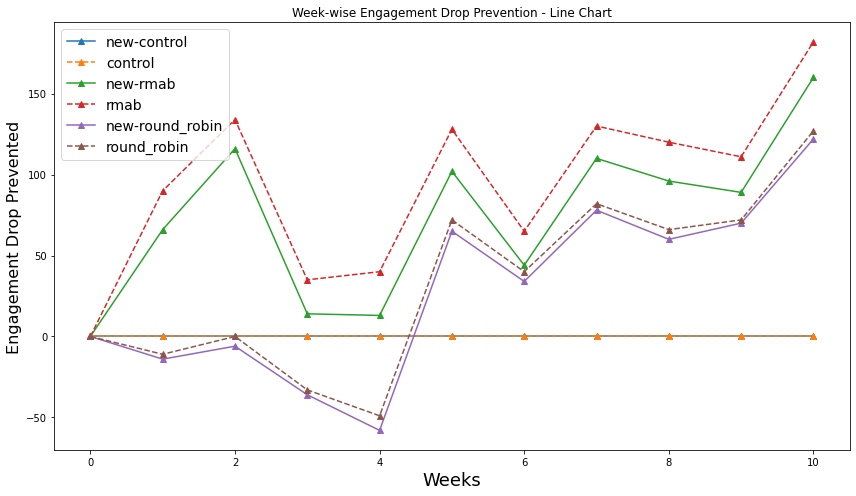

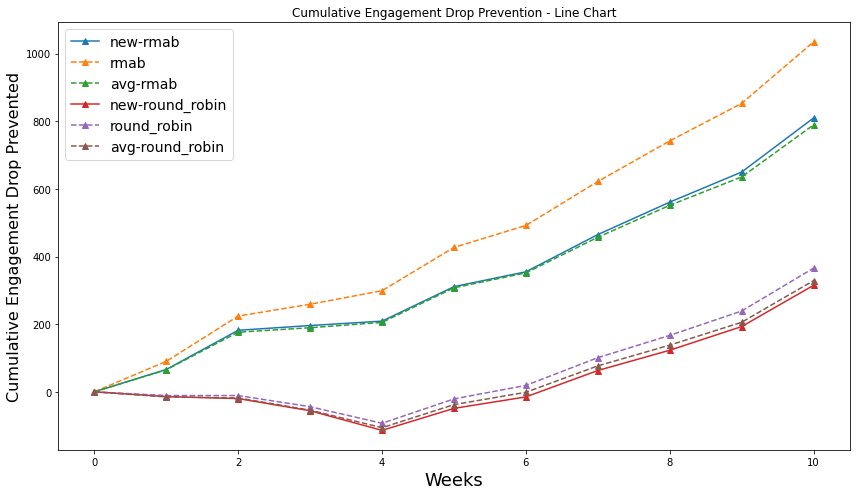

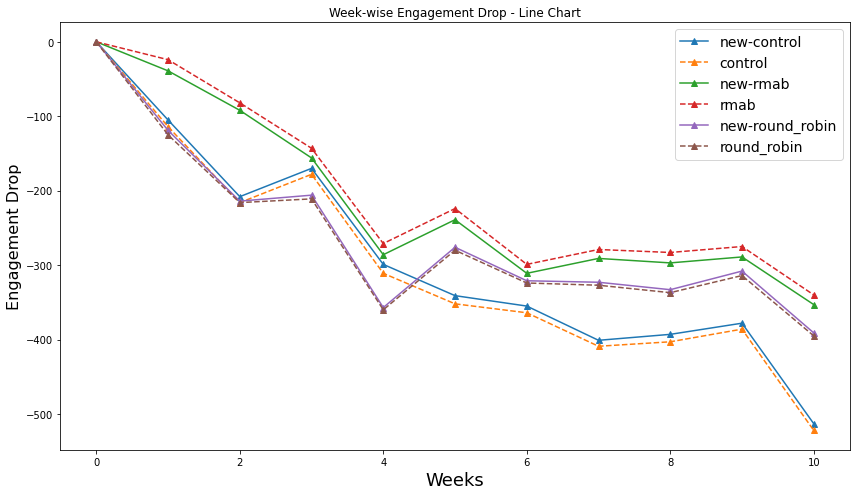

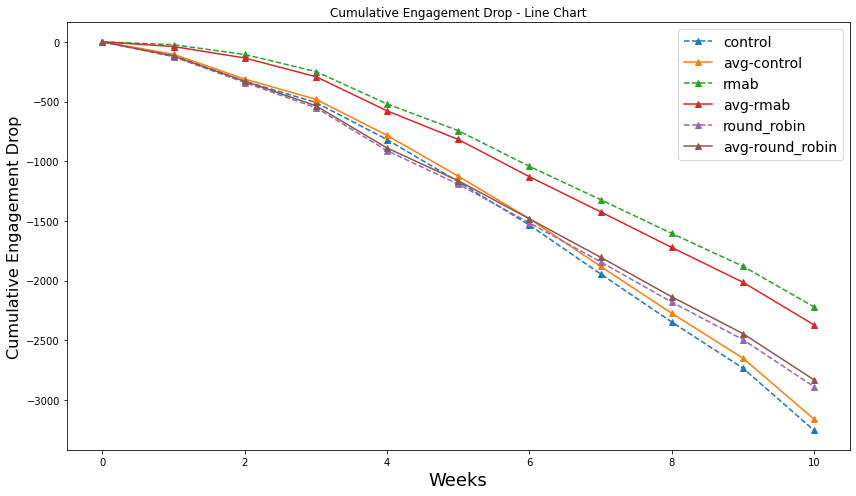

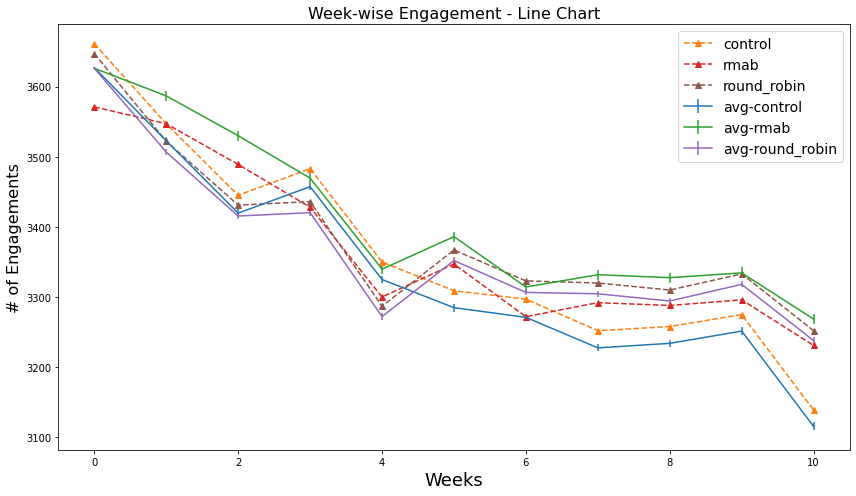

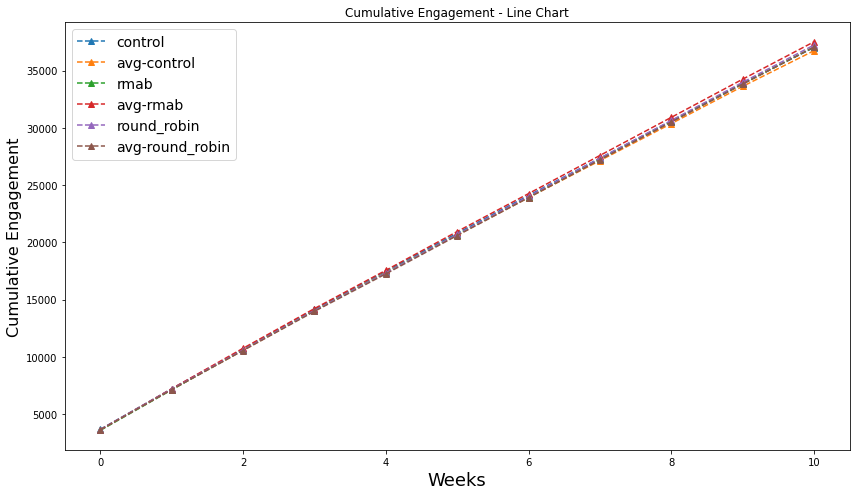

In [429]:
fig=plt.figure(figsize=(12, 7))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(horizon), np.array(new_inst_engage_drops[pol]) - np.array(new_inst_engage_drops['control']),
             '-^', label='new-'+pol)
    plt.plot(range(horizon), np.array(inst_engage_drops[pol]) - np.array(inst_engage_drops['control']),
             '--^', label=pol)
    
plt.title('Week-wise Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 


fig=plt.figure(figsize=(12, 7))


for pol in ['rmab','round_robin' ]:
    plt.plot(range(horizon), np.array(new_cumu_engage_drops[pol]) - np.array(new_cumu_engage_drops['control']),
             '-^', label='new-'+pol)
    plt.plot(range(horizon), np.array(cumu_engage_drops[pol]) - np.array(cumu_engage_drops['control']),
             '--^', label=pol)
    plt.plot(range(horizon), np.array(big_cumu_engage_drops[pol]).mean(axis=0) - \
                     np.array(big_cumu_engage_drops['control']).mean(axis=0),
             '--^', label='avg-'+pol)

plt.title('Cumulative Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 



fig=plt.figure(figsize=(12, 7))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(horizon), np.array(new_inst_engage_drops[pol]),
             '-^', label='new-'+pol)
    plt.plot(range(horizon), np.array(inst_engage_drops[pol]),
             '--^', label=pol)
    
plt.title('Week-wise Engagement Drop - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop', fontsize=16)
plt.tight_layout() 



fig=plt.figure(figsize=(12, 7))


for pol in ['control' , 'rmab','round_robin' ]:
#     plt.plot(range(horizon), np.array(new_cumu_engage_drops[pol]),
#              '-^', label='new-'+pol)
    plt.plot(range(horizon), np.array(cumu_engage_drops[pol]),
             '--^', label=pol)
    plt.plot(range(horizon), np.array(big_cumu_engage_drops[pol]).mean(axis=0),
             '-^', label='avg-'+pol)
    print(pol, [(f'week {idx}', i) for idx, i in enumerate(np.array(new_cumu_engage_drops[pol]))])

plt.title('Cumulative Engagement Drop - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop', fontsize=16)
plt.tight_layout() 


fig=plt.figure(figsize=(12, 7))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.errorbar(range(horizon), np.array(big_inst_engage[pol]).mean(axis=0),
                 yerr=2*np.array(big_inst_engage[pol]).std(axis=0)
             , label='avg-'+pol)
    plt.plot(range(horizon), np.array(inst_engage[pol]),
             '--^', label=pol)
    print(pol, [(f'week {idx}', i) for idx, i in enumerate(np.array(new_inst_engage[pol]))])

plt.title('Week-wise Engagement - Line Chart', fontsize=16)
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('# of Engagements', fontsize=16)
plt.tight_layout() 


fig=plt.figure(figsize=(12, 7))


for pol in ['control' , 'rmab','round_robin' ]:
#     plt.plot(range(horizon), np.array(new_cumu_engage[pol]),
#              '-^', label='new-'+pol)
    plt.plot(range(horizon), np.array(cumu_engage[pol]),
             '--^', label=pol)
    plt.plot(range(horizon), np.array(big_cumu_engage[pol]).mean(axis=0),
             '--^', label='avg-'+pol)
    print(pol, [(f'week {idx}', i) for idx, i in enumerate(np.array(new_cumu_engage[pol]))])

plt.title('Cumulative Engagement - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement', fontsize=16)
plt.tight_layout() 





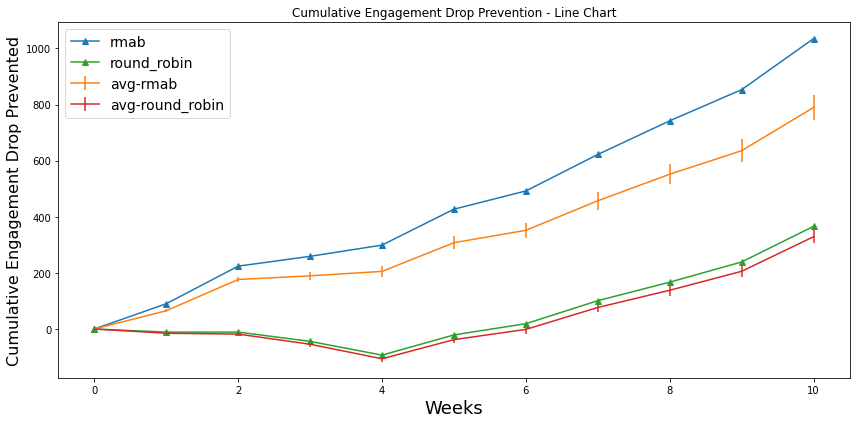

In [406]:
plt.figure(figsize=(12, 6))
for pol in ['rmab','round_robin' ]:
#     plt.plot(range(horizon), np.array(new_cumu_engage_drops[pol]) - np.array(new_cumu_engage_drops['control']),
#              '-^', label='new-'+pol)
    plt.plot(range(horizon), np.array(cumu_engage_drops[pol]) - np.array(cumu_engage_drops['control']),
             '-^', label=pol)
    plt.errorbar(range(horizon), np.array(big_cumu_engage_drops[pol]).mean(axis=0) - \
                     np.array(big_cumu_engage_drops['control']).mean(axis=0),
             yerr = (np.array(big_cumu_engage_drops[pol]) - \
                     np.array(big_cumu_engage_drops['control'])).std(axis=0),
                 label='avg-'+pol)

plt.title('Cumulative Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 

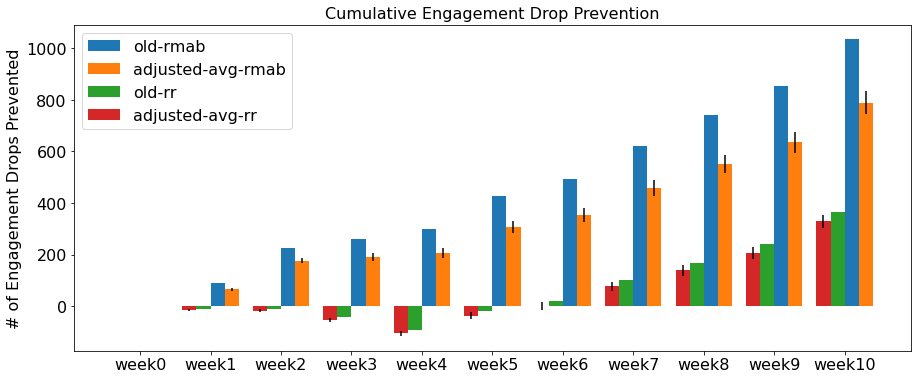

In [412]:
pol = 'rmab'
plt.figure(figsize=(15, 6))
width = 0.2


plt.bar(np.arange(horizon)+width/2,
        np.array(cumu_engage_drops[pol]) - np.array(cumu_engage_drops['control']),
        width=width, label='old-rmab')


plt.bar(np.arange(horizon)+3*width/2,
        np.array(big_cumu_engage_drops[pol]).mean(axis=0) - \
                     np.array(big_cumu_engage_drops['control']).mean(axis=0),
        yerr = (np.array(big_cumu_engage_drops[pol]) - \
                     np.array(big_cumu_engage_drops['control'])).std(axis=0),
        width=width, label='adjusted-avg-rmab')

pol = 'round_robin'
plt.bar(np.arange(horizon)-width/2,
        np.array(cumu_engage_drops[pol]) - np.array(cumu_engage_drops['control']),
        width=width, label='old-rr')

plt.bar(np.arange(horizon)-3*width/2,
        np.array(big_cumu_engage_drops[pol]).mean(axis=0) - \
                     np.array(big_cumu_engage_drops['control']).mean(axis=0),
        yerr = (np.array(big_cumu_engage_drops[pol]) - \
                     np.array(big_cumu_engage_drops['control'])).std(axis=0),
        width=width, label='adjusted-avg-rr')

plt.xticks(np.arange(horizon), [f'week{i}' for i in np.arange(horizon)], fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc=2)
plt.ylabel('# of Engagement Drops Prevented', fontsize=16)
plt.title('Cumulative Engagement Drop Prevention', fontsize=16)
plt.show()

In [452]:
import scipy
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for t in range(0, 12):
    print(f'Week {t}')
    rmab_cumu_drop = new_engagement_matrix['rmab'][:, :t+1].sum(axis=1) - (t+1)*new_engagement_matrix['rmab'][:, 0]
    rr_cumu_drop = new_engagement_matrix['round_robin'][:, :t+1].sum(axis=1) - (t+1)*new_engagement_matrix['round_robin'][:, 0]
    control_cumu_drop = new_engagement_matrix['control'][:, :t+1].sum(axis=1)- (t+1)*new_engagement_matrix['control'][:, 0]
    
    print(f'\n\t Cumu engagement Drop -> RMAB: {np.round(rmab_cumu_drop.sum(), 3)}, \
    RR: {np.round(rr_cumu_drop.sum(), 3)}, \
    Control: {np.round(control_cumu_drop.sum(), 3)},')
    
    st, p = scipy.stats.ttest_ind(rmab_cumu_drop,rr_cumu_drop)
    print(f'\t t statistic RMAB vs RR: {np.round(st, 3)}, p_val: {np.round(p, 3)}')
    
    st, p = scipy.stats.ttest_ind(rmab_cumu_drop,control_cumu_drop)
    print(f'\t t statistic RMAB vs Control: {np.round(st, 3)}, p_val: {np.round(p, 3)}')
    
    st, p = scipy.stats.ttest_ind(rr_cumu_drop,control_cumu_drop)
    print(f'\t t statistic RR vs Control: {np.round(st, 3)}, p_val: {np.round(p, 3)}')
    
    st, p = f_oneway(rmab_cumu_drop, rr_cumu_drop, control_cumu_drop)
    print(f'\t ANOVA statistic: {np.round(st, 3)}, p_val: {np.round(p, 3)}')

    print('\n')

Week 0

	 Cumu engagement Drop -> RMAB: 0,     RR: 0,     Control: 0,
	 t statistic RMAB vs RR: nan, p_val: nan
	 t statistic RMAB vs Control: nan, p_val: nan
	 t statistic RR vs Control: nan, p_val: nan
	 ANOVA statistic: nan, p_val: nan


Week 1

	 Cumu engagement Drop -> RMAB: -39,     RR: -119,     Control: -105,
	 t statistic RMAB vs RR: 1.498, p_val: 0.134
	 t statistic RMAB vs Control: 1.226, p_val: 0.22
	 t statistic RR vs Control: -0.259, p_val: 0.795
	 ANOVA statistic: 1.265, p_val: 0.282


Week 2

	 Cumu engagement Drop -> RMAB: -131,     RR: -333,     Control: -313,
	 t statistic RMAB vs RR: 2.109, p_val: 0.035
	 t statistic RMAB vs Control: 1.906, p_val: 0.057
	 t statistic RR vs Control: -0.208, p_val: 0.835
	 ANOVA statistic: 2.705, p_val: 0.067


Week 3

	 Cumu engagement Drop -> RMAB: -287,     RR: -539,     Control: -483,
	 t statistic RMAB vs RR: 1.822, p_val: 0.069
	 t statistic RMAB vs Control: 1.431, p_val: 0.153
	 t statistic RR vs Control: -0.405, p_val: 0.686
	

In [455]:
import scipy
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for t in range(0, 12):
    print(f'Week {t}')
    rmab_cumu_drop = engagement_matrix['rmab'][:, :t+1].sum(axis=1) - (t+1)*engagement_matrix['rmab'][:, 0]
    rr_cumu_drop = engagement_matrix['round_robin'][:, :t+1].sum(axis=1) - (t+1)*engagement_matrix['round_robin'][:, 0]
    control_cumu_drop = engagement_matrix['control'][:, :t+1].sum(axis=1)- (t+1)*engagement_matrix['control'][:, 0]
    
    print(f'\n\t Cumu engagement Drop -> RMAB: {np.round(rmab_cumu_drop.sum(), 3)}, \
    RR: {np.round(rr_cumu_drop.sum(), 3)}, \
    Control: {np.round(control_cumu_drop.sum(), 3)},')
    
    st, p = scipy.stats.ttest_ind(rmab_cumu_drop,rr_cumu_drop)
    print(f'\t t statistic RMAB vs RR: {np.round(st, 3)}, p_val: {np.round(p, 3)}')
    
    st, p = scipy.stats.ttest_ind(rmab_cumu_drop,control_cumu_drop)
    print(f'\t t statistic RMAB vs Control: {np.round(st, 3)}, p_val: {np.round(p, 3)}')
    
    st, p = scipy.stats.ttest_ind(rr_cumu_drop,control_cumu_drop)
    print(f'\t t statistic RR vs Control: {np.round(st, 3)}, p_val: {np.round(p, 3)}')
    
    st, p = f_oneway(rmab_cumu_drop, rr_cumu_drop, control_cumu_drop)
    print(f'\t ANOVA statistic: {np.round(st, 3)}, p_val: {np.round(p, 3)}')

    print('\n')

Week 0

	 Cumu engagement Drop -> RMAB: 0,     RR: 0,     Control: 0,
	 t statistic RMAB vs RR: nan, p_val: nan
	 t statistic RMAB vs Control: nan, p_val: nan
	 t statistic RR vs Control: nan, p_val: nan
	 ANOVA statistic: nan, p_val: nan


Week 1

	 Cumu engagement Drop -> RMAB: -24,     RR: -125,     Control: -114,
	 t statistic RMAB vs RR: 1.891, p_val: 0.059
	 t statistic RMAB vs Control: 1.671, p_val: 0.095
	 t statistic RR vs Control: -0.204, p_val: 0.839
	 ANOVA statistic: 2.128, p_val: 0.119


Week 2

	 Cumu engagement Drop -> RMAB: -106,     RR: -341,     Control: -330,
	 t statistic RMAB vs RR: 2.453, p_val: 0.014
	 t statistic RMAB vs Control: 2.345, p_val: 0.019
	 t statistic RR vs Control: -0.114, p_val: 0.909
	 ANOVA statistic: 3.84, p_val: 0.021


Week 3

	 Cumu engagement Drop -> RMAB: -249,     RR: -552,     Control: -508,
	 t statistic RMAB vs RR: 2.189, p_val: 0.029
	 t statistic RMAB vs Control: 1.89, p_val: 0.059
	 t statistic RR vs Control: -0.318, p_val: 0.75
	 A

In [462]:
rmab_user_ids = df[df['arm']=='rmab']['user_id'].to_list()
round_robin_user_ids = df[df['arm']=='round_robin']['user_id'].to_list()
control_user_ids = df[df['arm']=='control']['user_id'].to_list()


In [461]:
pilot_pd_data = pd.read_csv("feb16-mar15_data/beneficiary/ai_registration-20210216-20210315.csv", sep='\t')
class_based_features = ['phone_owner' , "language"]
numeric_features = ['enroll_gest_age', "enroll_delivery_status", 
                    'age_binned', 'g', 'p', 's', 'l', 'a', 'education', 'income_binned']

pilot_pd_data['income_binned'] = pilot_pd_data['income_bracket'].replace(
    dict(zip(['0-5000', '5000-10000', '10000-15000', '15000-20000',
        '20000-25000', '25000-30000', '30000 and above'], [0,1,2,3,4,5,6])))
pilot_pd_data['age_binned'] = pd.cut(pilot_pd_data['age'], bins=3, labels=False)


dummy = pd.get_dummies(pilot_pd_data[class_based_features], columns = class_based_features)
pilot_pd_data = pd.concat([pilot_pd_data.drop(columns = class_based_features), dummy], axis=1)
class_based_features = list(dummy.columns)

pilot_pd_data[numeric_features+class_based_features+['age']]



,enroll_gest_age,enroll_delivery_status,age_binned,g,p,s,l,a,education,income_binned,phone_owner_family,phone_owner_husband,phone_owner_neighbor,phone_owner_woman,language_2,language_3,language_5,age
0,13,0,0,2,1,0.0,1,0,2,1,0,0,0,1,1,0,0,23
1,14,0,0,1,0,0.0,0,0,3,1,0,0,0,1,1,0,0,19
2,8,0,0,1,0,0.0,0,0,2,1,0,0,0,1,0,1,0,20
3,11,0,0,2,1,0.0,1,0,4,1,0,0,0,1,0,1,0,25
4,31,0,0,3,2,0.0,2,0,7,1,0,0,0,1,1,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23522,8,0,0,3,0,0.0,0,2,3,1,0,0,0,1,0,1,0,25
23523,39,0,0,1,0,0.0,0,0,5,2,0,0,0,1,1,0,0,21
23524,26,0,0,2,1,0.0,1,0,4,1,0,0,0,1,1,0,0,22
23525,21,0,0,1,0,0.0,0,0,3,1,0,0,0,1,1,0,0,26


In [463]:
columns = numeric_features+class_based_features + ["exp_arm_rmab","exp_arm_rr"]
pilot_user_ids = new_df.user_id
# with open('policy_dump.pkl', 'rb') as fr:
#     pilot_user_ids, pilot_static_features, cls, cluster_transition_probabilities, m_values, q_values = pickle.load(fr)
# fr.close()

pilot_static_features = pilot_pd_data[pilot_pd_data['user_id'].isin(pilot_user_ids)][numeric_features+class_based_features+['user_id']]
pilot_static_features = pilot_static_features.set_index('user_id')
pilot_static_features = pilot_static_features.loc[pilot_user_ids].values

arm_to_cat = {'rmab': [1,0], 'round_robin': [0,1], 'control': [0,0]}
full_mat = {'rmab': [], 'round_robin': [], 'control': []}


In [472]:
X_mat, Y_mat = [], [[] for i in range(1,13)]

mask = {'rmab':[0]*len(pilot_user_ids), 'round_robin':[0]*len(pilot_user_ids), 'control':[0]*len(pilot_user_ids)}
ctr = 0
for idx, user_id in tqdm.tqdm(enumerate(pilot_user_ids)):

    curr_mat = []
    curr_row = new_df[new_df['user_id'] == user_id]

    arm = curr_row['arm'].item()
    count = 0

    week0e = int(curr_row['week{}_E/C'.format(0)].item().split('/')[0])

    if week0e:
        curr_mat.append(1)
        count += 1
    else:
        curr_mat.append(0)
    Y_mat[0].append(curr_mat[0])
    for i in range(1,12):
        nume = int(curr_row['week{}_E/C'.format(i)].item().split('/')[0])
        if nume > 0:
            count += 1
            curr_mat.append(1)
        else:
            curr_mat.append(0)
        Y_mat[i].append(count)
    X_mat.append(list(pilot_static_features[idx, :]) + arm_to_cat[arm])

    mask[arm][ctr] = 1
    ctr+=1

    full_mat[arm].append(np.array(curr_mat, dtype=np.int))

mask = {i:np.array(mask[i][:ctr]) for i in mask}
X_mat = np.array(X_mat)
Y_mat = np.array(Y_mat)


23003it [00:20, 1124.44it/s]


In [473]:
import statsmodels.api as sm

for t in range(1,12):
    print(f'Significance for T = {t}')
    print('\tRMAB vs RR')
    Y_mat_df = pd.DataFrame(Y_mat[t][mask['control']==0]-(t+1)*Y_mat[0][mask['control']==0], columns = ['output'])
    X_mat_df = pd.DataFrame(X_mat[mask['control']==0][:, :-1], columns = columns[:-1])

    mod = sm.OLS(Y_mat_df,sm.add_constant(X_mat_df))
    fii = mod.fit()
    var, coef, std_err, t_val, p_val, q1, q3 = fii.summary().tables[1].data[-1]
    print(f'\tCoef: {coef}, p_val: {p_val}')
    print('\n')
    print('\tRMAB vs Control')
    Y_mat_df = pd.DataFrame(Y_mat[t][mask['round_robin']==0]-(t+1)*Y_mat[0][mask['round_robin']==0], columns = ['output'])
    X_mat_df = pd.DataFrame(X_mat[mask['round_robin']==0][:, :-1], columns = columns[:-1])

    mod = sm.OLS(Y_mat_df,sm.add_constant(X_mat_df))
    fii = mod.fit()
    var, coef, std_err, t_val, p_val, q1, q3 = fii.summary().tables[1].data[-1]
    print(f'\tCoef: {coef}, p_val: {p_val}')
    print('\n')
    print('\tRR vs Control')
    Y_mat_df = pd.DataFrame(Y_mat[t][mask['rmab']==0]-(t+1)*Y_mat[0][mask['rmab']==0], columns = ['output'])
    X_mat_df = pd.DataFrame(np.concatenate([X_mat[mask['rmab']==0][:, :-2],
                                            X_mat[mask['rmab']==0][:, -1:]], axis=1),
                            columns = columns[:-2]+columns[-1:])

    mod = sm.OLS(Y_mat_df,sm.add_constant(X_mat_df))
    fii = mod.fit()
    var, coef, std_err, t_val, p_val, q1, q3 = fii.summary().tables[1].data[-1]
    print(f'\tCoef: {coef}, p_val: {p_val}')
    print('\n\n')

Significance for T = 1
	RMAB vs RR
	Coef:     0.0106, p_val:  0.129


	RMAB vs Control
	Coef:     0.0090, p_val:  0.201


	RR vs Control
	Coef:    -0.0018, p_val:  0.802



Significance for T = 2
	RMAB vs RR
	Coef:     0.0266, p_val:  0.033


	RMAB vs Control
	Coef:     0.0241, p_val:  0.053


	RR vs Control
	Coef:    -0.0027, p_val:  0.830



Significance for T = 3
	RMAB vs RR
	Coef:     0.0333, p_val:  0.065


	RMAB vs Control
	Coef:     0.0262, p_val:  0.143


	RR vs Control
	Coef:    -0.0072, p_val:  0.688



Significance for T = 4
	RMAB vs RR
	Coef:     0.0425, p_val:  0.072


	RMAB vs Control
	Coef:     0.0277, p_val:  0.238


	RR vs Control
	Coef:    -0.0148, p_val:  0.531



Significance for T = 5
	RMAB vs RR
	Coef:     0.0473, p_val:  0.107


	RMAB vs Control
	Coef:     0.0410, p_val:  0.158


	RR vs Control
	Coef:    -0.0063, p_val:  0.830



Significance for T = 6
	RMAB vs RR
	Coef:     0.0484, p_val:  0.168


	RMAB vs Control
	Coef:     0.0469, p_val:  0.177


	RR vs Contro

In [ ]:
0.098
0.044